<a href="https://colab.research.google.com/github/kzumreen/FoodTrendsPrediction/blob/main/GoogleTrendsEDAipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

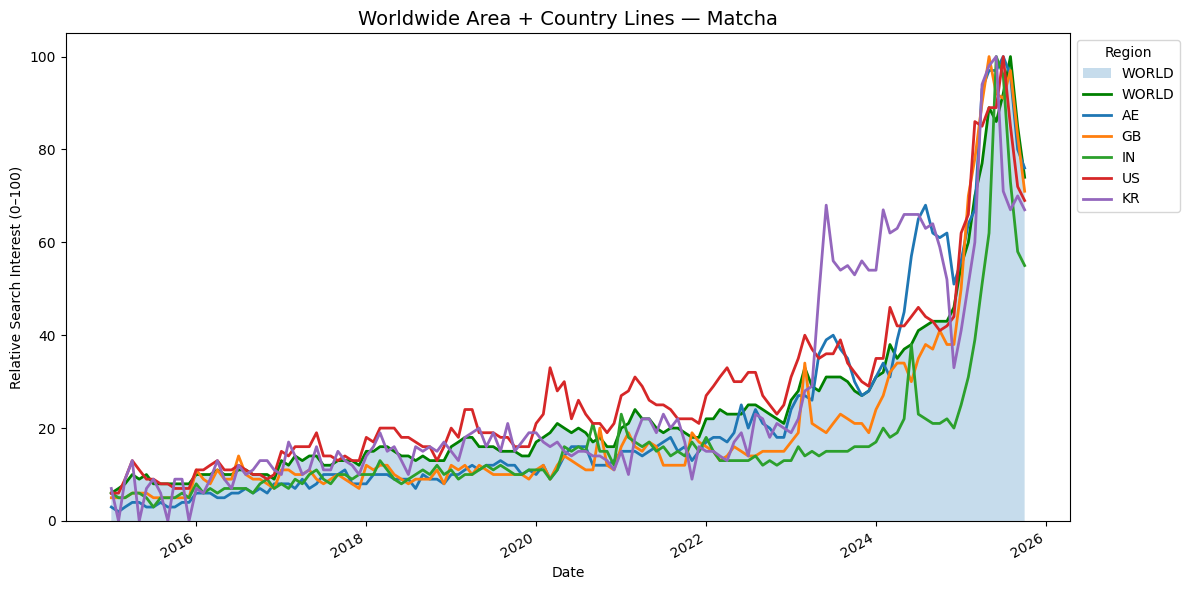

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("pytrends_worldwide_and_countries.csv", index_col=0, parse_dates=True)

# --- Matcha ---
world_col = "matcha_WORLD"
countries = ["AE", "GB", "IN", "US", "KR"]
country_cols = [f"matcha_{c}" for c in countries if f"matcha_{c}" in df.columns]

fig, ax = plt.subplots(figsize=(12,6))
ax.fill_between(df.index, df[world_col], alpha=0.25, label="WORLD")
ax.plot(df.index, df[world_col], color='green', linewidth=2, label="WORLD")

for c in country_cols:
    ax.plot(df.index, df[c], linewidth=2, label=c.split("_")[-1])

ax.set_title("Worldwide Area + Country Lines — Matcha", fontsize=14)
ax.set_ylabel("Relative Search Interest (0–100)")
ax.set_xlabel("Date")
ax.legend(title="Region", loc='upper left', bbox_to_anchor=(1,1))
ax.set_ylim(bottom=0)
fig.autofmt_xdate()
plt.tight_layout()
plt.savefig("fig_area_matcha_world_and_countries.png", dpi=150)
plt.show()


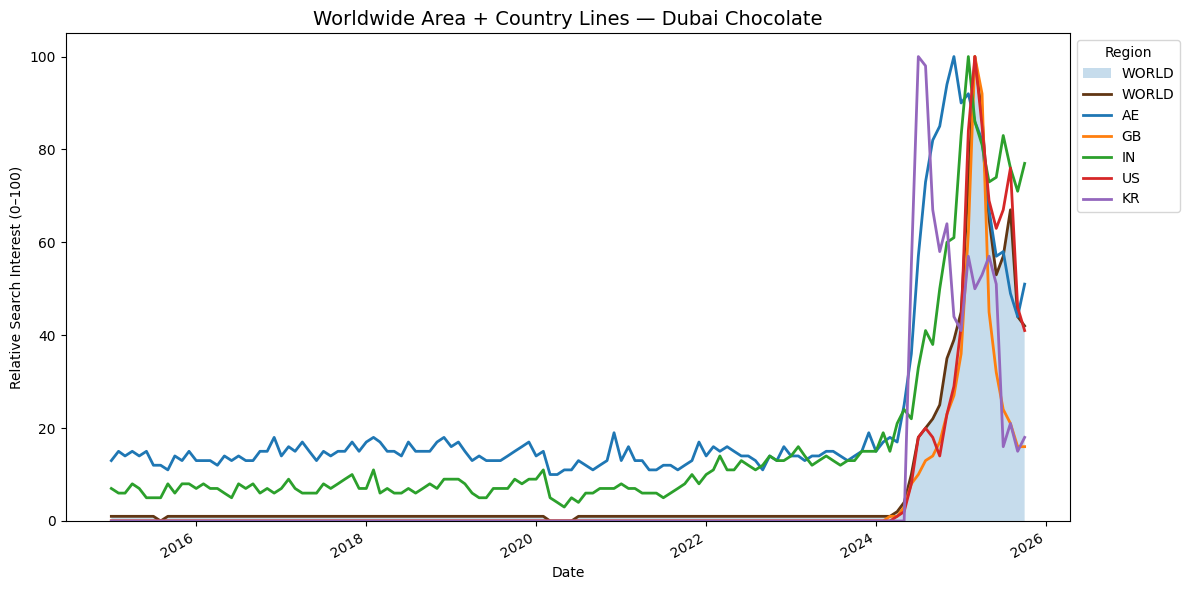

In [16]:
# --- Dubai Chocolate ---
world_col = "dubai_chocolate_WORLD"
countries = ["AE", "GB", "IN", "US", "KR"]
country_cols = [f"dubai_chocolate_{c}" for c in countries if f"dubai_chocolate_{c}" in df.columns]

fig, ax = plt.subplots(figsize=(12,6))
ax.fill_between(df.index, df[world_col], alpha=0.25, label="WORLD")
ax.plot(df.index, df[world_col], color='#613613', linewidth=2, label="WORLD")

for c in country_cols:
    ax.plot(df.index, df[c], linewidth=2, label=c.split("_")[-1])

ax.set_title("Worldwide Area + Country Lines — Dubai Chocolate", fontsize=14)
ax.set_ylabel("Relative Search Interest (0–100)")
ax.set_xlabel("Date")
ax.legend(title="Region", loc='upper left', bbox_to_anchor=(1,1))
ax.set_ylim(bottom=0)
fig.autofmt_xdate()
plt.tight_layout()
plt.savefig("fig_area_dubai_chocolate_world_and_countries.png", dpi=150)
plt.show()


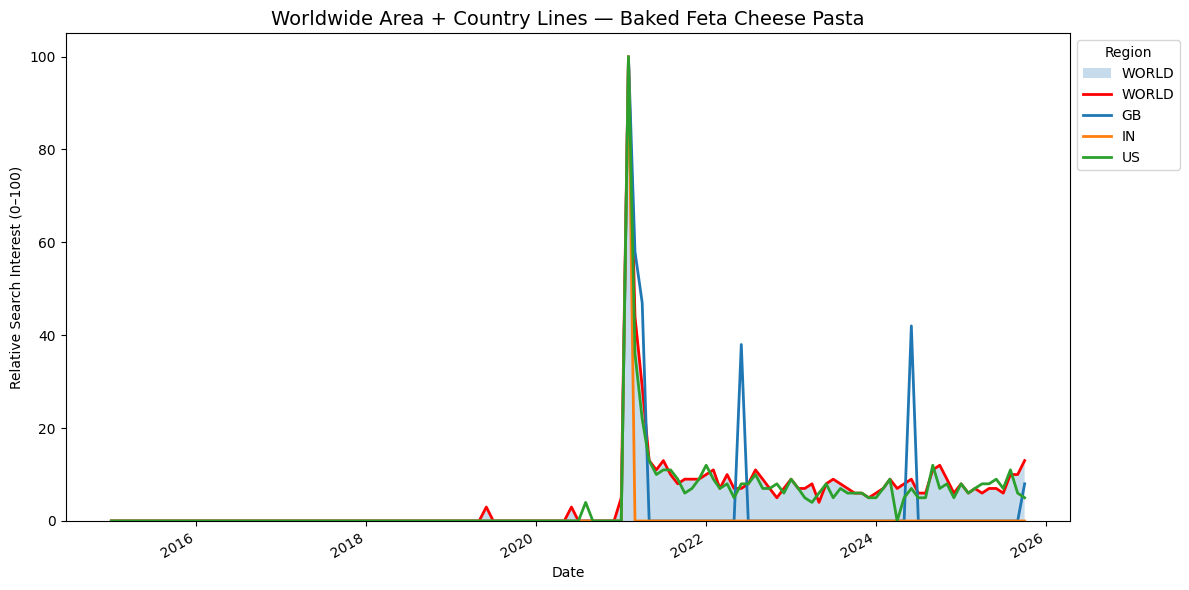

In [17]:
# --- Baked Feta Cheese Pasta ---
world_col = "baked_feta_cheese_pasta_WORLD"
countries = ["AE", "GB", "IN", "US", "KR"]
country_cols = [f"baked_feta_cheese_pasta_{c}" for c in countries if f"baked_feta_cheese_pasta_{c}" in df.columns]

fig, ax = plt.subplots(figsize=(12,6))
ax.fill_between(df.index, df[world_col], alpha=0.25, label="WORLD")
ax.plot(df.index, df[world_col], color='red', linewidth=2, label="WORLD")

for c in country_cols:
    ax.plot(df.index, df[c], linewidth=2, label=c.split("_")[-1])

ax.set_title("Worldwide Area + Country Lines — Baked Feta Cheese Pasta", fontsize=14)
ax.set_ylabel("Relative Search Interest (0–100)")
ax.set_xlabel("Date")
ax.legend(title="Region", loc='upper left', bbox_to_anchor=(1,1))
ax.set_ylim(bottom=0)
fig.autofmt_xdate()
plt.tight_layout()
plt.savefig("fig_area_baked_feta_cheese_pasta_world_and_countries.png", dpi=150)
plt.show()


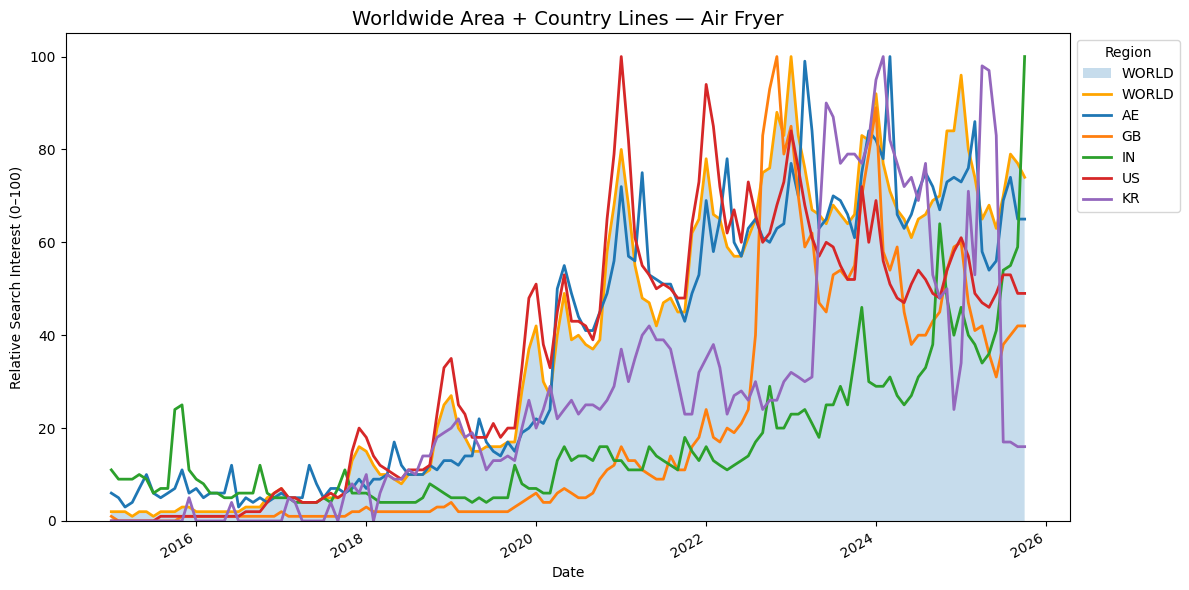

In [18]:
# --- Air Fryer ---
world_col = "air_fryer_WORLD"
countries = ["AE", "GB", "IN", "US", "KR"]
country_cols = [f"air_fryer_{c}" for c in countries if f"air_fryer_{c}" in df.columns]

fig, ax = plt.subplots(figsize=(12,6))
ax.fill_between(df.index, df[world_col], alpha=0.25, label="WORLD")
ax.plot(df.index, df[world_col], color='orange', linewidth=2, label="WORLD")

for c in country_cols:
    ax.plot(df.index, df[c], linewidth=2, label=c.split("_")[-1])

ax.set_title("Worldwide Area + Country Lines — Air Fryer", fontsize=14)
ax.set_ylabel("Relative Search Interest (0–100)")
ax.set_xlabel("Date")
ax.legend(title="Region", loc='upper left', bbox_to_anchor=(1,1))
ax.set_ylim(bottom=0)
fig.autofmt_xdate()
plt.tight_layout()
plt.savefig("fig_area_air_fryer_world_and_countries.png", dpi=150)
plt.show()


In [19]:
# Chunk 1: Load & clean CSV (run this first)
import pandas as pd
import numpy as np
from pathlib import Path

CSV_PATH = "pytrends_worldwide_and_countries.csv"
OUTDIR = Path("eda_plots")
OUTDIR.mkdir(exist_ok=True)

# load
df = pd.read_csv(CSV_PATH, index_col=0, parse_dates=True)
# normalize column names (strip whitespace)
df.columns = [c.strip() for c in df.columns]

# coerce all columns to numeric where possible (safe)
for c in df.columns:
    df[c] = pd.to_numeric(df[c], errors="coerce")

print("Loaded CSV:", CSV_PATH)
print("Shape:", df.shape)
print("Date range:", df.index.min(), "to", df.index.max())
print("Example columns:", df.columns[:20].tolist())

# helper: robust column finder
def find_col(keyword, tag=None, df=df):
    """
    Finds a column name containing keyword and optional tag (like 'world').
    Tries multiple common patterns; returns first match or None.
    """
    kw = keyword.lower().strip()
    if tag:
        tg = tag.lower().strip()
        # patterns: startswith + endswith_tag, contains both
        cand = next((c for c in df.columns if c.lower().startswith(kw) and c.lower().endswith("_"+tg)), None)
        if cand: return cand
        cand = next((c for c in df.columns if kw in c.lower() and tg in c.lower()), None)
        if cand: return cand
        # allow "keyword tag" with space
        cand = next((c for c in df.columns if kw in c.lower() and (" "+tg) in c.lower()), None)
        if cand: return cand
    else:
        # no tag, try exact or startswith
        cand = next((c for c in df.columns if c.lower()==kw), None)
        if cand: return cand
        cand = next((c for c in df.columns if c.lower().startswith(kw)), None)
        if cand: return cand
    return None



Loaded CSV: pytrends_worldwide_and_countries.csv
Shape: (130, 22)
Date range: 2015-01-01 00:00:00 to 2025-10-01 00:00:00
Example columns: ['matcha_WORLD', 'dubai_chocolate_WORLD', 'baked_feta_cheese_pasta_WORLD', 'air_fryer_WORLD', 'matcha_AE', 'dubai_chocolate_AE', 'air_fryer_AE', 'matcha_GB', 'dubai_chocolate_GB', 'baked_feta_cheese_pasta_GB', 'air_fryer_GB', 'matcha_IN', 'dubai_chocolate_IN', 'baked_feta_cheese_pasta_IN', 'air_fryer_IN', 'matcha_US', 'dubai_chocolate_US', 'baked_feta_cheese_pasta_US', 'air_fryer_US', 'matcha_KR']


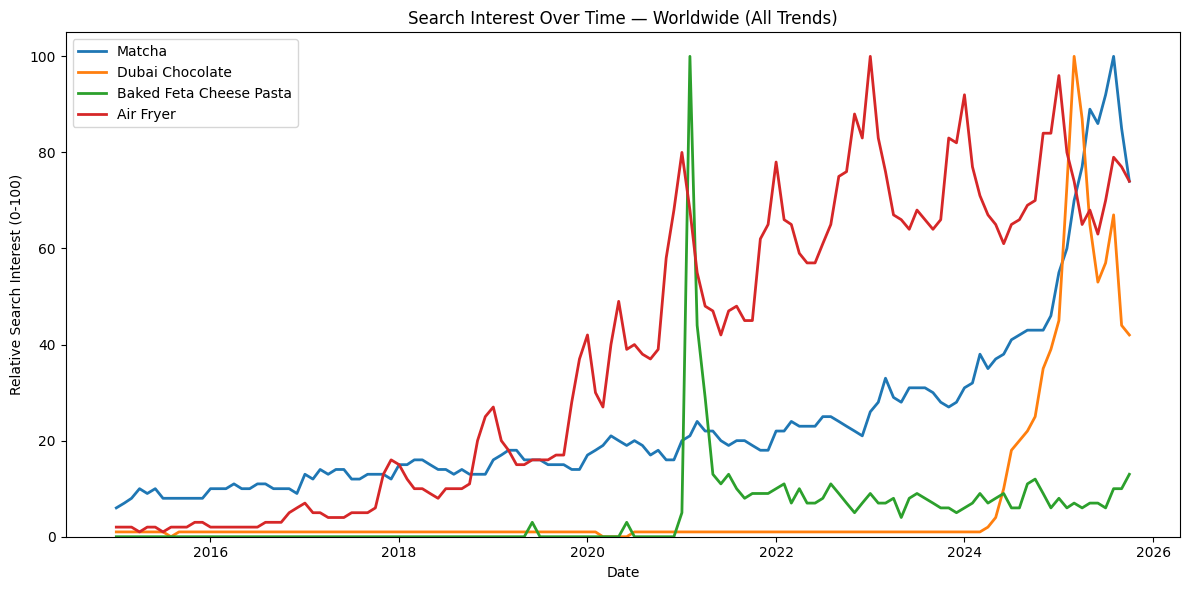

Saved combined plot to: eda_plots/time_series_all_trends_worldwide.png


In [20]:
# Chunk 2: Combined worldwide time-series (all 4 trends)
import matplotlib.pyplot as plt

KEYWORDS = ["matcha", "dubai_chocolate", "baked_feta_cheese_pasta", "air_fryer"]
FIG_PATH = OUTDIR / "time_series_all_trends_worldwide.png"

plt.close("all")
fig, ax = plt.subplots(figsize=(12,6))

found = 0
for kw in KEYWORDS:
    col = find_col(kw, tag="world")
    if col and col in df.columns:
        series = df[col].fillna(0).astype(float)
        ax.plot(df.index, series, linewidth=2, label=kw.replace("_"," ").title())
        found += 1

if found == 0:
    raise RuntimeError("No WORLD columns detected. Check CSV column names (e.g., matcha_WORLD).")

ax.set_title("Search Interest Over Time — Worldwide (All Trends)")
ax.set_ylabel("Relative Search Interest (0-100)")
ax.set_xlabel("Date")
ax.legend()
ax.set_ylim(bottom=0)
fig.tight_layout()
fig.savefig(FIG_PATH, dpi=150)
plt.show()
print("Saved combined plot to:", FIG_PATH)


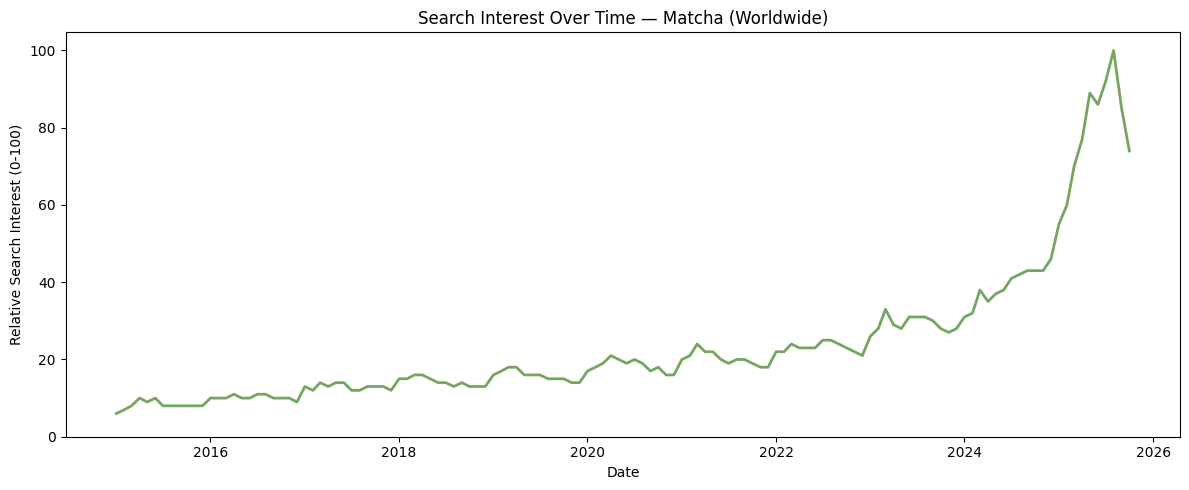

Saved: eda_plots/time_series_matcha_worldwide.png


In [21]:
# Chunk 3: Matcha worldwide time-series
import matplotlib.pyplot as plt

kw = "matcha"
col = find_col(kw, tag="world") or find_col(kw)
if col is None or col not in df.columns:
    print("Matcha WORLD column not found. Available matcha-like columns:", [c for c in df.columns if "matcha" in c.lower()])
else:
    out = OUTDIR / "time_series_matcha_worldwide.png"
    plt.close("all")
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(df.index, df[col].fillna(0).astype(float), linewidth=2, color="#74A662")
    ax.set_title("Search Interest Over Time — Matcha (Worldwide)")
    ax.set_ylabel("Relative Search Interest (0-100)")
    ax.set_xlabel("Date")
    ax.set_ylim(bottom=0)
    fig.tight_layout()
    fig.savefig(out, dpi=150)
    plt.show()
    print("Saved:", out)


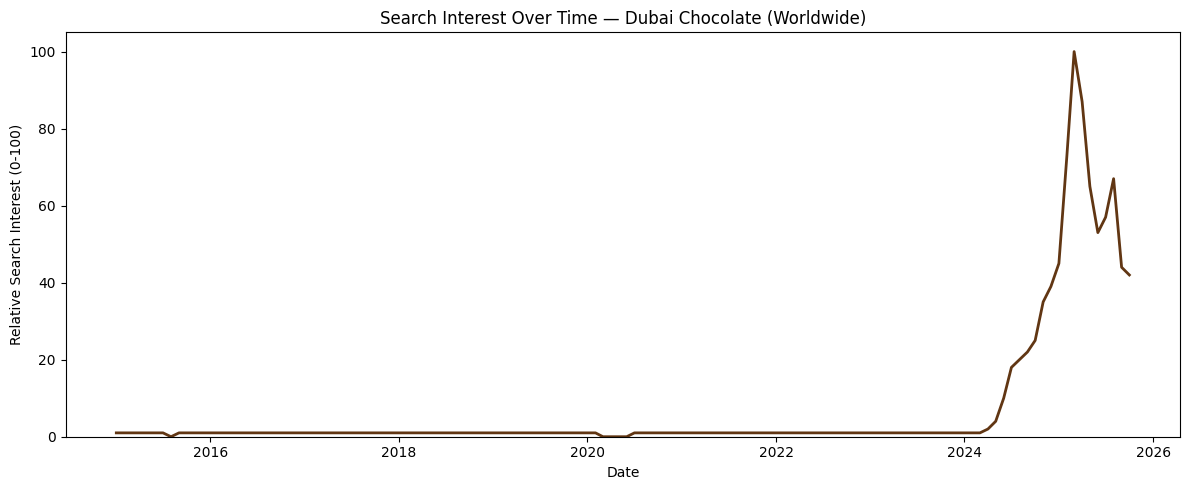

Saved: eda_plots/time_series_dubai_chocolate_worldwide.png


In [22]:
# Chunk 4: Dubai Chocolate worldwide time-series
import matplotlib.pyplot as plt

kw = "dubai_chocolate"
col = find_col(kw, tag="world") or find_col("dubai chocolate", tag="world") or find_col(kw)
if col is None or col not in df.columns:
    print("Dubai Chocolate WORLD column not found. Available dubai-like columns:", [c for c in df.columns if "dubai" in c.lower()])
else:
    out = OUTDIR / "time_series_dubai_chocolate_worldwide.png"
    plt.close("all")
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(df.index, df[col].fillna(0).astype(float), linewidth=2, color="#613613")
    ax.set_title("Search Interest Over Time — Dubai Chocolate (Worldwide)")
    ax.set_ylabel("Relative Search Interest (0-100)")
    ax.set_xlabel("Date")
    ax.set_ylim(bottom=0)
    fig.tight_layout()
    fig.savefig(out, dpi=150)
    plt.show()
    print("Saved:", out)


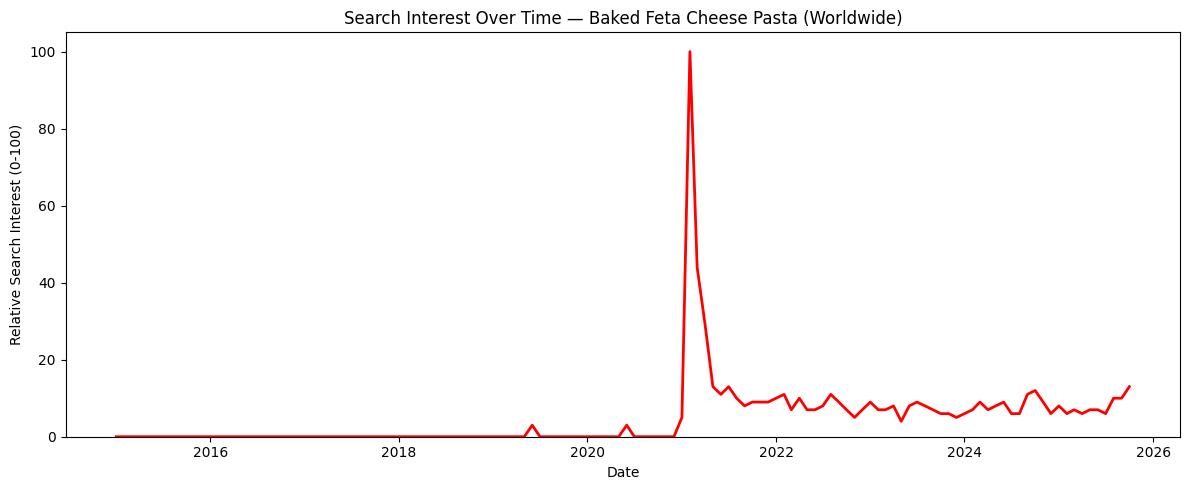

Saved: eda_plots/time_series_baked_feta_worldwide.png


In [23]:
# Chunk 5: Baked Feta Cheese Pasta worldwide time-series
import matplotlib.pyplot as plt

kw = "baked_feta_cheese_pasta"
col = find_col(kw, tag="world") or find_col("baked feta cheese pasta", tag="world") or find_col(kw)
if col is None or col not in df.columns:
    print("Baked Feta WORLD column not found. Available feta-like columns:", [c for c in df.columns if "feta" in c.lower()])
else:
    out = OUTDIR / "time_series_baked_feta_worldwide.png"
    plt.close("all")
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(df.index, df[col].fillna(0).astype(float), linewidth=2, color="red")
    ax.set_title("Search Interest Over Time — Baked Feta Cheese Pasta (Worldwide)")
    ax.set_ylabel("Relative Search Interest (0-100)")
    ax.set_xlabel("Date")
    ax.set_ylim(bottom=0)
    fig.tight_layout()
    fig.savefig(out, dpi=150)
    plt.show()
    print("Saved:", out)


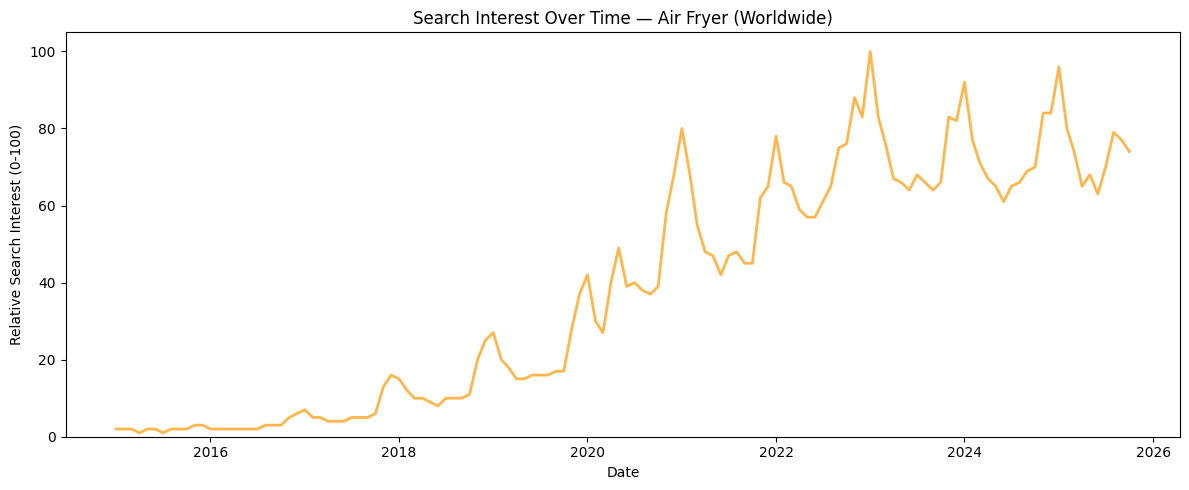

Saved: eda_plots/time_series_air_fryer_worldwide.png


In [24]:
# Chunk 6: Air Fryer worldwide time-series
import matplotlib.pyplot as plt

kw = "air_fryer"
col = find_col(kw, tag="world") or find_col("air fryer", tag="world") or find_col(kw)
if col is None or col not in df.columns:
    print("Air Fryer WORLD column not found. Available air-like columns:", [c for c in df.columns if "air" in c.lower()])
else:
    out = OUTDIR / "time_series_air_fryer_worldwide.png"
    plt.close("all")
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(df.index, df[col].fillna(0).astype(float), linewidth=2, color="#FFB74D")
    ax.set_title("Search Interest Over Time — Air Fryer (Worldwide)")
    ax.set_ylabel("Relative Search Interest (0-100)")
    ax.set_xlabel("Date")
    ax.set_ylim(bottom=0)
    fig.tight_layout()
    fig.savefig(out, dpi=150)
    plt.show()
    print("Saved:", out)
